In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/ProgettiUNI/ProgettoSAM/'

files = os.listdir(folder_path)

files_to_exclude = ['cve_parser.csv', 'epss.csv', 'demographics.csv']

csv_files_to_merge = [f for f in files if f.endswith('.csv') and f not in files_to_exclude]

dataframes_to_merge = {}

for csv_file in csv_files_to_merge:
    file_path = os.path.join(folder_path, csv_file)
    df_name = os.path.splitext(csv_file)[0]
    try:
        dataframes_to_merge[df_name] = pd.read_csv(file_path)
        print(f"Caricato con successo il file per l'unione: {csv_file}")
    except Exception as e:
        print(f"Errore durante il caricamento del file {csv_file} per l'unione: {e}")

cve_parser_df = None
cve_parser_file_path = os.path.join(folder_path, files_to_exclude[0])
if os.path.exists(cve_parser_file_path):
    try:
        cve_parser_df = pd.read_csv(cve_parser_file_path)
        print(f"\nCaricato con successo il file separato: {files_to_exclude[0]}")
    except Exception as e:
        print(f"Errore durante il caricamento del file separato {files_to_exclude[0]}: {e}")
else:
    print(f"\nIl file {files_to_exclude[0]} non è stato trovato nella cartella specificata.")

epss_df = None
epss_file_path = os.path.join(folder_path, files_to_exclude[1])
if os.path.exists(epss_file_path):
    try:
        epss_df = pd.read_csv(epss_file_path)
        print(f"\nCaricato con successo il file separato: {files_to_exclude[1]}")
    except Exception as e:
        print(f"Errore durante il caricamento del file separato {files_to_exclude[1]}: {e}")
else:
    print(f"\nIl file {files_to_exclude[1]} non è stato trovato nella cartella specificata.")

demographics_df = None
demographics_file_path = os.path.join(folder_path, files_to_exclude[2])
if os.path.exists(demographics_file_path):
    try:
        demographics_df = pd.read_csv(demographics_file_path)
        print(f"\nCaricato con successo il file separato: {files_to_exclude[2]}")
    except Exception as e:
        print(f"Errore durante il caricamento del file separato {files_to_exclude[2]}: {e}")
else:
    print(f"\nIl file {files_to_exclude[2]} non è stato trovato nella cartella specificata.")

Caricato con successo il file per l'unione: 150..240.csv
Caricato con successo il file per l'unione: >1800.csv
Caricato con successo il file per l'unione: 450..999.csv
Caricato con successo il file per l'unione: 19..22.csv
Caricato con successo il file per l'unione: 50..65.csv
Caricato con successo il file per l'unione: 240..450.csv

Caricato con successo il file separato: cve_parser.csv

Caricato con successo il file separato: epss.csv

Caricato con successo il file separato: demographics.csv


In [ ]:
merged_df = pd.concat(dataframes_to_merge.values(), ignore_index=True)

display(merged_df.head())

print("\nInformazioni sul DataFrame unito:")
merged_df.info()

,repository,star_range,star,latest_push,files,total_dependencies,number_of_vulnerabilities,ghsa,cve_strings,cvss,severity,sploitus_number_of_pocs
0,idinging/freemail,150..240,240,2025-09-22T15:22:49Z,package.json,0,0,NaN,NaN,NaN,NaN,0
1,rapideditor/country-coder,150..240,240,2025-07-29T09:48:31Z,package.json,10,0,NaN,NaN,NaN,NaN,0
2,evenchange4/graphql.macro,150..240,240,2025-07-25T01:34:10Z,package.json,16,3,"GHSA-5q88-cjfq-g2mh,GHSA-xp63-6vf5-xf3v,GHSA-m...","CVE-2020-7596,CVE-2020-15123,CVE-2020-7597",9.3,"HIGH,HIGH,MODERATE",0
3,pelias/api,150..240,240,2025-09-17T18:55:36Z,package.json,37,6,"GHSA-qw6h-vgh9-j6wx,GHSA-rv95-896h-c2vc,GHSA-f...","CVE-2017-16013,CVE-2017-1000042,CVE-2019-5413,...","6.1,9.8,5.0,7.5,7.8","CRITICAL,MODERATE,LOW,LOW,HIGH",0
4,EnigmaticaModpacks/Enigmatica6,150..240,240,2025-08-13T11:09:33Z,package.json,4,4,"GHSA-wf5p-g6vw-rhxx,GHSA-jr5f-v2jv-69x6,GHSA-4...","CVE-2024-57965,CVE-2023-45857,CVE-2025-58754,C...","0.0,0.0","HIGH,HIGH,MODERATE,HIGH,HIGH",0



Informazioni sul DataFrame unito:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   repository                 5375 non-null   object
 1   star_range                 5375 non-null   object
 2   star                       5375 non-null   int64 
 3   latest_push                5375 non-null   object
 4   files                      5375 non-null   object
 5   total_dependencies         5375 non-null   int64 
 6   number_of_vulnerabilities  5375 non-null   int64 
 7   ghsa                       2474 non-null   object
 8   cve_strings                2580 non-null   object
 9   cvss                       2160 non-null   object
 10  severity                   2476 non-null   object
 11  sploitus_number_of_pocs    5375 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 504.0+ KB


In [ ]:
filtered_df = merged_df[merged_df['total_dependencies'] > 0].copy()

display(filtered_df.head())

print("\nInformazioni sul DataFrame dopo aver rimosso i repository con 0 dipendenze:")
filtered_df.info()

,repository,star_range,star,latest_push,files,total_dependencies,number_of_vulnerabilities,ghsa,cve_strings,cvss,severity,sploitus_number_of_pocs
1,rapideditor/country-coder,150..240,240,2025-07-29T09:48:31Z,package.json,10,0,NaN,NaN,NaN,NaN,0
2,evenchange4/graphql.macro,150..240,240,2025-07-25T01:34:10Z,package.json,16,3,"GHSA-5q88-cjfq-g2mh,GHSA-xp63-6vf5-xf3v,GHSA-m...","CVE-2020-7596,CVE-2020-15123,CVE-2020-7597",9.3,"HIGH,HIGH,MODERATE",0
3,pelias/api,150..240,240,2025-09-17T18:55:36Z,package.json,37,6,"GHSA-qw6h-vgh9-j6wx,GHSA-rv95-896h-c2vc,GHSA-f...","CVE-2017-16013,CVE-2017-1000042,CVE-2019-5413,...","6.1,9.8,5.0,7.5,7.8","CRITICAL,MODERATE,LOW,LOW,HIGH",0
4,EnigmaticaModpacks/Enigmatica6,150..240,240,2025-08-13T11:09:33Z,package.json,4,4,"GHSA-wf5p-g6vw-rhxx,GHSA-jr5f-v2jv-69x6,GHSA-4...","CVE-2024-57965,CVE-2023-45857,CVE-2025-58754,C...","0.0,0.0","HIGH,HIGH,MODERATE,HIGH,HIGH",0
5,eslint/generator-eslint,150..240,240,2025-09-18T16:02:19Z,package.json,9,0,NaN,NaN,NaN,NaN,0



Informazioni sul DataFrame dopo aver rimosso i repository con 0 dipendenze:
<class 'pandas.core.frame.DataFrame'>
Index: 4429 entries, 1 to 5372
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   repository                 4429 non-null   object
 1   star_range                 4429 non-null   object
 2   star                       4429 non-null   int64 
 3   latest_push                4429 non-null   object
 4   files                      4429 non-null   object
 5   total_dependencies         4429 non-null   int64 
 6   number_of_vulnerabilities  4429 non-null   int64 
 7   ghsa                       2474 non-null   object
 8   cve_strings                2580 non-null   object
 9   cvss                       2160 non-null   object
 10  severity                   2476 non-null   object
 11  sploitus_number_of_pocs    4429 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 449.8+ KB

In [ ]:
columns_to_fill = ['ghsa', 'cve_strings', 'cvss', 'severity']
filtered_df[columns_to_fill] = filtered_df[columns_to_fill].fillna('')

filtered_df['star_range'] = filtered_df['star_range'].replace({
    '19..22': '019..22',
    '50..65': '050..65'
})

print("Informazioni sul DataFrame dopo aver riempito i valori NaN:")
filtered_df.info()

display(filtered_df.head())

Informazioni sul DataFrame dopo aver riempito i valori NaN:
<class 'pandas.core.frame.DataFrame'>
Index: 4429 entries, 1 to 5372
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   repository                 4429 non-null   object
 1   star_range                 4429 non-null   object
 2   star                       4429 non-null   int64 
 3   latest_push                4429 non-null   object
 4   files                      4429 non-null   object
 5   total_dependencies         4429 non-null   int64 
 6   number_of_vulnerabilities  4429 non-null   int64 
 7   ghsa                       4429 non-null   object
 8   cve_strings                4429 non-null   object
 9   cvss                       4429 non-null   object
 10  severity                   4429 non-null   object
 11  sploitus_number_of_pocs    4429 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 449.8+ KB


,repository,star_range,star,latest_push,files,total_dependencies,number_of_vulnerabilities,ghsa,cve_strings,cvss,severity,sploitus_number_of_pocs
1,rapideditor/country-coder,150..240,240,2025-07-29T09:48:31Z,package.json,10,0,,,,,0
2,evenchange4/graphql.macro,150..240,240,2025-07-25T01:34:10Z,package.json,16,3,"GHSA-5q88-cjfq-g2mh,GHSA-xp63-6vf5-xf3v,GHSA-m...","CVE-2020-7596,CVE-2020-15123,CVE-2020-7597",9.3,"HIGH,HIGH,MODERATE",0
3,pelias/api,150..240,240,2025-09-17T18:55:36Z,package.json,37,6,"GHSA-qw6h-vgh9-j6wx,GHSA-rv95-896h-c2vc,GHSA-f...","CVE-2017-16013,CVE-2017-1000042,CVE-2019-5413,...","6.1,9.8,5.0,7.5,7.8","CRITICAL,MODERATE,LOW,LOW,HIGH",0
4,EnigmaticaModpacks/Enigmatica6,150..240,240,2025-08-13T11:09:33Z,package.json,4,4,"GHSA-wf5p-g6vw-rhxx,GHSA-jr5f-v2jv-69x6,GHSA-4...","CVE-2024-57965,CVE-2023-45857,CVE-2025-58754,C...","0.0,0.0","HIGH,HIGH,MODERATE,HIGH,HIGH",0
5,eslint/generator-eslint,150..240,240,2025-09-18T16:02:19Z,package.json,9,0,,,,,0


In [ ]:
vulnerability_by_star_range = filtered_df.groupby('star_range')['number_of_vulnerabilities'].apply(
    lambda x: pd.Series({
        'With Vulnerabilities': (x > 0).sum(),
        'Without Vulnerabilities': (x == 0).sum()
    })
).unstack()

vulnerability_by_star_range_percentage = vulnerability_by_star_range.apply(lambda x: x / x.sum() * 100, axis=1)

print("Conteggio dei repository con e senza vulnerabilità per star_range:")
display(vulnerability_by_star_range)

print("\nPercentuale dei repository con e senza vulnerabilità per star_range:")
display(vulnerability_by_star_range_percentage)

Conteggio dei repository con e senza vulnerabilità per star_range:


,With Vulnerabilities,Without Vulnerabilities
star_range,,
019..22,427,345
050..65,456,301
150..240,399,311
240..450,492,321
450..999,406,282
>1800,440,249



Percentuale dei repository con e senza vulnerabilità per star_range:


,With Vulnerabilities,Without Vulnerabilities
star_range,,
019..22,55.310881,44.689119
050..65,60.237781,39.762219
150..240,56.197183,43.802817
240..450,60.516605,39.483395
450..999,59.011628,40.988372
>1800,63.860668,36.139332


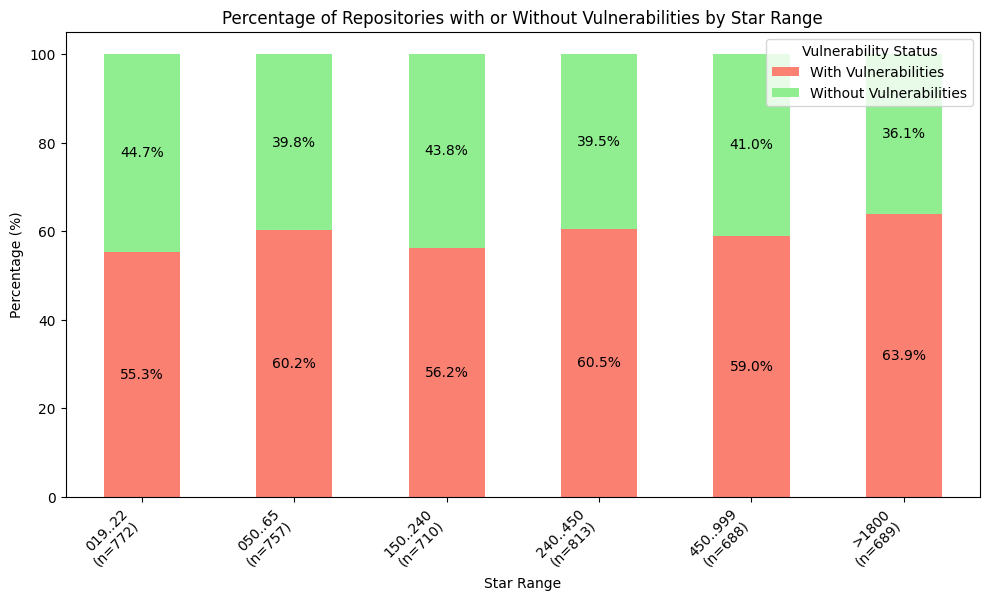

In [ ]:
import matplotlib.pyplot as plt

ax = vulnerability_by_star_range_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])

plt.title('Percentage of Repositories with or Without Vulnerabilities by Star Range')
plt.xlabel('Star Range')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vulnerability Status')
plt.tight_layout()

for container in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

total_counts = vulnerability_by_star_range.sum(axis=1)
new_labels = [f'{label}\n(n={total_counts[label]})' for label in vulnerability_by_star_range.index]
ax.set_xticklabels(new_labels)


plt.show()

In [ ]:
vulnerable_repos = filtered_df[filtered_df['number_of_vulnerabilities'] > 0].shape[0]

non_vulnerable_repos = filtered_df[filtered_df['number_of_vulnerabilities'] == 0].shape[0]

vulnerability_counts = pd.Series([vulnerable_repos, non_vulnerable_repos], index=['With Vulnerabilities', 'Without Vulnerabilities'])

vulnerability_percentages = vulnerability_counts / vulnerability_counts.sum() * 100

print("Conteggio dei repository con e senza vulnerabilità:")
print(vulnerability_counts)
print("\nPercentuale dei repository con e senza vulnerabilità:")
print(vulnerability_percentages)

Conteggio dei repository con e senza vulnerabilità:
With Vulnerabilities       2620
Without Vulnerabilities    1809
dtype: int64

Percentuale dei repository con e senza vulnerabilità:
With Vulnerabilities       59.155566
Without Vulnerabilities    40.844434
dtype: float64


/tmp/ipython-input-2229480522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=vulnerability_counts.index, y=vulnerability_counts.values, palette=['salmon', 'lightgreen'])


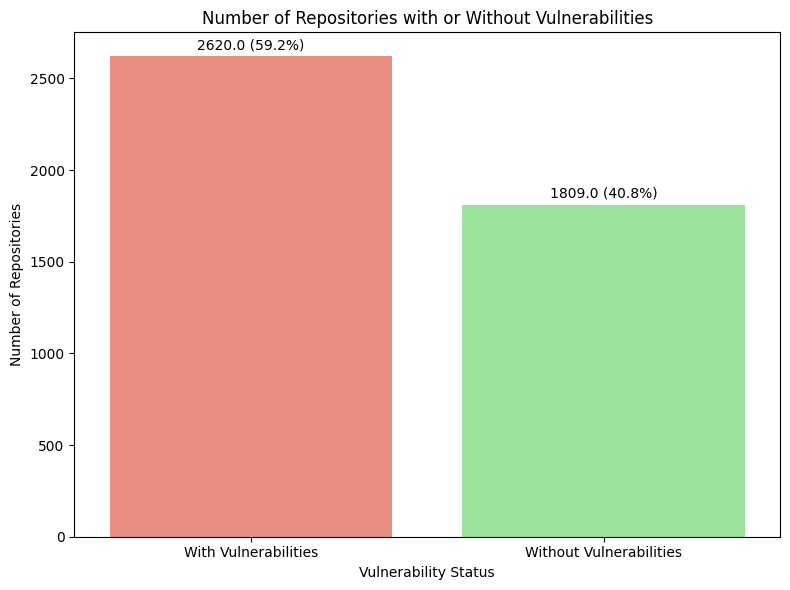

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=vulnerability_counts.index, y=vulnerability_counts.values, palette=['salmon', 'lightgreen'])

plt.title('Number of Repositories with or Without Vulnerabilities')
plt.xlabel('Vulnerability Status')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)
plt.tight_layout()

total = vulnerability_counts.sum()
for container in ax.containers:
    labels = []
    for v in container:
        height = v.get_height()
        percentage = (height / total) * 100 if total > 0 else 0
        labels.append(f'{height} ({percentage:.1f}%)')
    ax.bar_label(container, labels=labels, padding=3)

plt.show()

In [ ]:
critical_vulnerability_df = filtered_df[filtered_df['severity'].str.contains('CRITICAL', na=False)].copy()


critical_vulnerable_count = critical_vulnerability_df.shape[0]

critical_vulnerable_in_vulnerable_set = filtered_df[
    (filtered_df['number_of_vulnerabilities'] > 0) &
    (filtered_df['severity'].str.contains('CRITICAL', na=False))
].shape[0]

non_critical_vulnerable_in_vulnerable_set = filtered_df[
    (filtered_df['number_of_vulnerabilities'] > 0) &
    (~filtered_df['severity'].str.contains('CRITICAL', na=False))
].shape[0]

critical_vulnerability_comparison_counts = pd.Series(
    [critical_vulnerable_in_vulnerable_set, non_critical_vulnerable_in_vulnerable_set],
    index=['With CRITICAL', 'Without CRITICAL']
)

critical_vulnerability_comparison_percentages = critical_vulnerability_comparison_counts / critical_vulnerability_comparison_counts.sum() * 100

print("Conteggio dei repository con e senza vulnerabilità CRITICAL (tra i repository vulnerabili):")
print(critical_vulnerability_comparison_counts)
print("\nPercentuale dei repository con e senza vulnerabilità CRITICAL (tra i repository vulnerabili):")
print(critical_vulnerability_comparison_percentages)

Conteggio dei repository con e senza vulnerabilità CRITICAL (tra i repository vulnerabili):
With CRITICAL        719
Without CRITICAL    1901
dtype: int64

Percentuale dei repository con e senza vulnerabilità CRITICAL (tra i repository vulnerabili):
With CRITICAL       27.442748
Without CRITICAL    72.557252
dtype: float64


/tmp/ipython-input-282022555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=critical_vulnerability_comparison_counts.index, y=critical_vulnerability_comparison_counts.values, palette=['red', 'orange'])


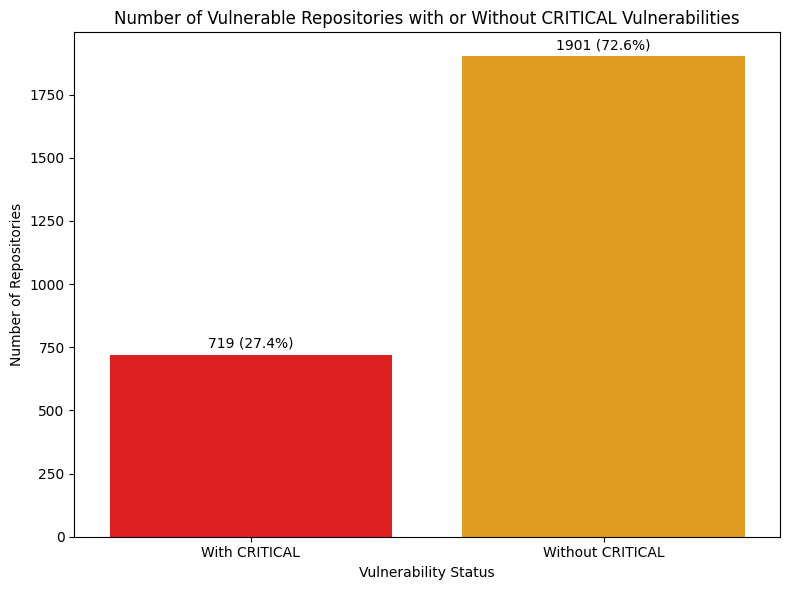

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=critical_vulnerability_comparison_counts.index, y=critical_vulnerability_comparison_counts.values, palette=['red', 'orange'])

plt.title('Number of Vulnerable Repositories with or Without CRITICAL Vulnerabilities')
plt.xlabel('Vulnerability Status')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)
plt.tight_layout()

total = critical_vulnerability_comparison_counts.sum()
for container in ax.containers:
    labels = []
    for v in container:
        height = v.get_height()
        percentage = (height / total) * 100 if total > 0 else 0
        labels.append(f'{int(height)} ({percentage:.1f}%)')
    ax.bar_label(container, labels=labels, padding=3)

plt.show()

In [ ]:
critical_and_high_vulnerability_df = filtered_df[
    filtered_df['severity'].str.contains('CRITICAL|HIGH', na=False)
].copy()


critical_and_high_vulnerable_count = critical_and_high_vulnerability_df.shape[0]

all_vulnerable_repos_df = filtered_df[filtered_df['number_of_vulnerabilities'] > 0].copy()

critical_and_high_vulnerable_in_vulnerable_set = all_vulnerable_repos_df[
    all_vulnerable_repos_df['severity'].str.contains('CRITICAL|HIGH', na=False)
].shape[0]

non_critical_and_high_vulnerable_in_vulnerable_set = all_vulnerable_repos_df.shape[0] - critical_and_high_vulnerable_in_vulnerable_set


critical_and_high_vulnerability_comparison_counts = pd.Series(
    [critical_and_high_vulnerable_in_vulnerable_set, non_critical_and_high_vulnerable_in_vulnerable_set],
    index=['With CRITICAL or HIGH', 'Without CRITICAL or HIGH']
)

critical_and_high_vulnerability_comparison_percentages = critical_and_high_vulnerability_comparison_counts / critical_and_high_vulnerability_comparison_counts.sum() * 100

print("Conteggio dei repository con e senza vulnerabilità CRITICAL o HIGH (tra i repository vulnerabili):")
print(critical_and_high_vulnerability_comparison_counts)
print("\nPercentuale dei repository con e senza vulnerabilità CRITICAL o HIGH (tra i repository vulnerabili):")
print(critical_and_high_vulnerability_comparison_percentages)

Conteggio dei repository con e senza vulnerabilità CRITICAL o HIGH (tra i repository vulnerabili):
With CRITICAL or HIGH       1801
Without CRITICAL or HIGH     819
dtype: int64

Percentuale dei repository con e senza vulnerabilità CRITICAL o HIGH (tra i repository vulnerabili):
With CRITICAL or HIGH       68.740458
Without CRITICAL or HIGH    31.259542
dtype: float64


/tmp/ipython-input-3506327293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=critical_and_high_vulnerability_comparison_counts.index, y=critical_and_high_vulnerability_comparison_counts.values, palette=['red', 'orange'])


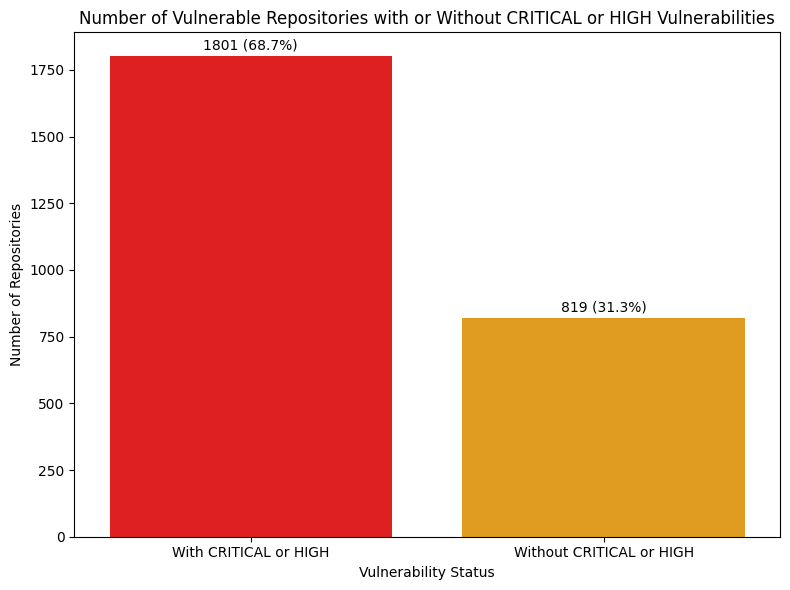

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=critical_and_high_vulnerability_comparison_counts.index, y=critical_and_high_vulnerability_comparison_counts.values, palette=['red', 'orange'])

plt.title('Number of Vulnerable Repositories with or Without CRITICAL or HIGH Vulnerabilities')
plt.xlabel('Vulnerability Status')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)
plt.tight_layout()

total = critical_and_high_vulnerability_comparison_counts.sum()
for container in ax.containers:
    labels = []
    for v in container:
        height = v.get_height()
        percentage = (height / total) * 100 if total > 0 else 0
        labels.append(f'{int(height)} ({percentage:.1f}%)')
    ax.bar_label(container, labels=labels, padding=3)

plt.show()

In [ ]:
cve_list = filtered_df['cve_strings'].str.split(',', expand=True).stack()

cve_list = cve_list.str.strip()

cve_list = cve_list[cve_list != '']

cve_counts = cve_list.value_counts().reset_index()
cve_counts.columns = ['cve', 'count']

cve_counts_with_scores = pd.merge(cve_counts, cve_parser_df[['cve', 'scores']], on='cve', how='left')

print("Conteggio delle occorrenze per ogni CVE con score associato:")
display(cve_counts_with_scores.head())

print("\nNumero totale di CVE unici:")
print(len(cve_counts_with_scores))

print("\nNumero totale di CVE trovate (incluse duplicati):")
print(len(cve_list))

Conteggio delle occorrenze per ogni CVE con score associato:


,cve,count,scores
0,CVE-2025-58754,544,7.5
1,CVE-2024-43796,415,5
2,CVE-2025-58752,406,2.3
3,CVE-2025-58751,406,2.3
4,CVE-2025-27152,385,7.7



Numero totale di CVE unici:
942

Numero totale di CVE trovate (incluse duplicati):
16008


/tmp/ipython-input-4098889316.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cve', y='count', data=top_cve_counts_with_scores, palette=sm.to_rgba(top_cve_counts_with_scores['scores']))
/tmp/ipython-input-4098889316.py:24: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='cve', y='count', data=top_cve_counts_with_scores, palette=sm.to_rgba(top_cve_counts_with_scores['scores']))


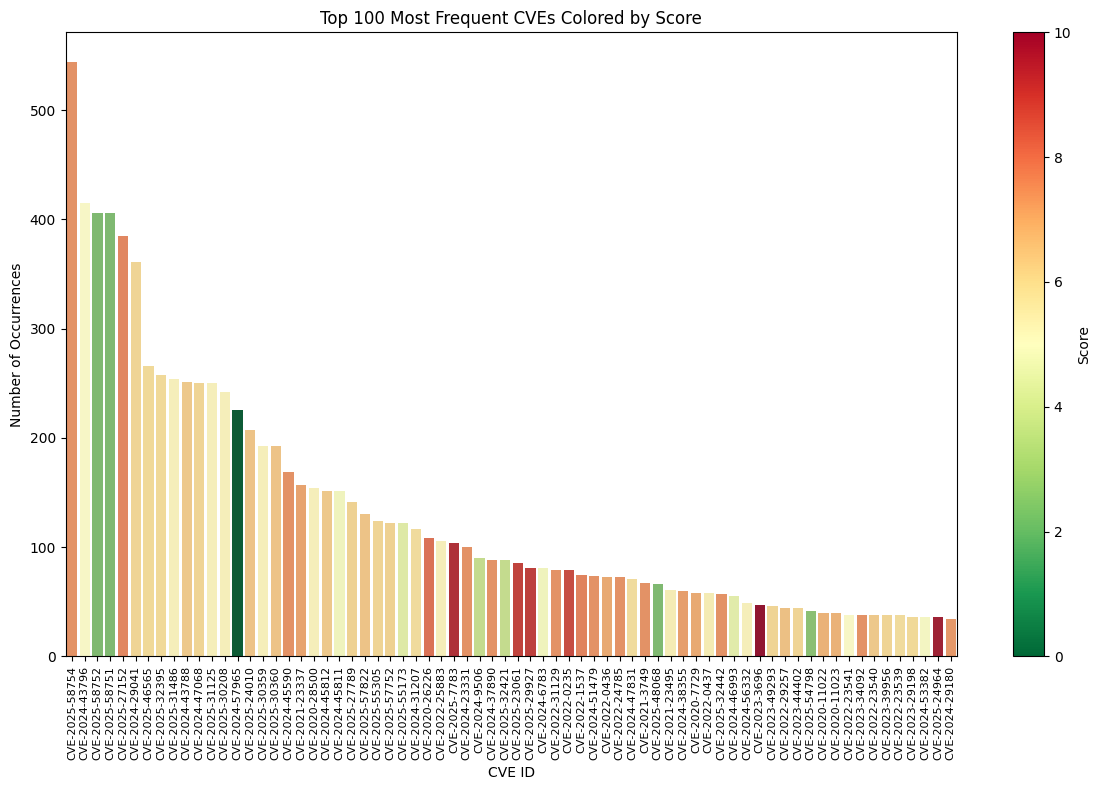

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

top_n = 100

top_cve_counts_with_scores = cve_counts_with_scores.head(top_n).copy()

top_cve_counts_with_scores['scores'] = pd.to_numeric(top_cve_counts_with_scores['scores'], errors='coerce')

top_cve_counts_with_scores = top_cve_counts_with_scores.dropna(subset=['scores'])

top_cve_counts_with_scores = top_cve_counts_with_scores.sort_values(by='count', ascending=False)


plt.figure(figsize=(12, 8))

cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

norm = plt.Normalize(vmin=0, vmax=10)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax = sns.barplot(x='cve', y='count', data=top_cve_counts_with_scores, palette=sm.to_rgba(top_cve_counts_with_scores['scores']))


plt.title(f'Top {top_n} Most Frequent CVEs Colored by Score')
plt.xlabel('CVE ID')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Score')

plt.show()

In [ ]:
vulnerable_repos_df = filtered_df[filtered_df['number_of_vulnerabilities'] > 0].copy()


vulnerable_repos_df['num_critical_vulnerabilities'] = vulnerable_repos_df['severity'].str.count('CRITICAL')

end = 11

percentage_data = {}
absolute_counts = {}
total_vulnerable_repos = vulnerable_repos_df.shape[0]

count_0 = (vulnerable_repos_df['num_critical_vulnerabilities'] == 0).sum()
percentage_data['0'] = (count_0 / total_vulnerable_repos) * 100 if total_vulnerable_repos > 0 else 0
absolute_counts['0'] = count_0


for i in range(1, end+1):
    count_ge_i = (vulnerable_repos_df['num_critical_vulnerabilities'] == i).sum()
    percentage_data[f'{i}'] = (count_ge_i / total_vulnerable_repos) * 100 if total_vulnerable_repos > 0 else 0
    absolute_counts[f'{i}'] = count_ge_i

count_ge_end = (vulnerable_repos_df['num_critical_vulnerabilities'] >= end+1).sum()
percentage_data[f'>={end+1}'] = (count_ge_end / total_vulnerable_repos) * 100 if total_vulnerable_repos > 0 else 0
absolute_counts[f'>={end+1}'] = count_ge_end

percentage_series = pd.Series(percentage_data)
absolute_series = pd.Series(absolute_counts)

critical_vulnerability_summary_df = pd.DataFrame({
    'Percentage': percentage_series,
    'Absolute Count': absolute_series
})


print("Riepilogo dei repository vulnerabili per numero di vulnerabilità CRITICAL:")
display(critical_vulnerability_summary_df)

Riepilogo dei repository vulnerabili per numero di vulnerabilità CRITICAL:


,Percentage,Absolute Count
0,72.557252,1901
1,19.045802,499
2,3.358779,88
3,2.633588,69
4,1.183206,31
5,0.343511,9
6,0.343511,9
7,0.229008,6
8,0.114504,3
9,0.038168,1


/tmp/ipython-input-4213635904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=critical_vulnerability_summary_df.index.tolist(), y=critical_vulnerability_summary_df['Percentage'].values, palette='viridis', width=0.3)


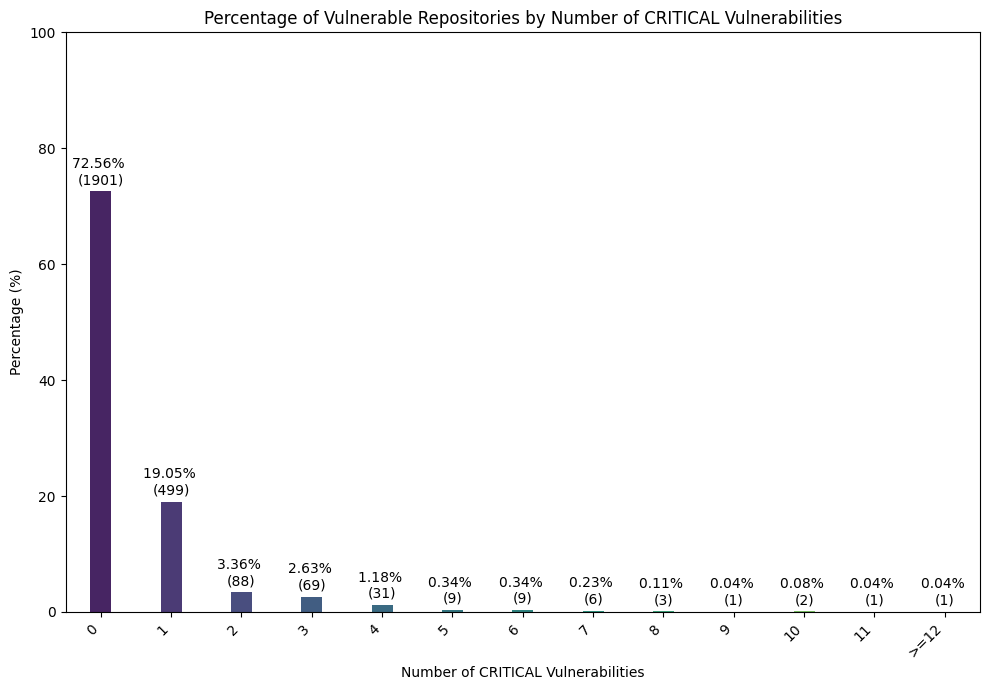

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=critical_vulnerability_summary_df.index.tolist(), y=critical_vulnerability_summary_df['Percentage'].values, palette='viridis', width=0.3)

plt.title('Percentage of Vulnerable Repositories by Number of CRITICAL Vulnerabilities')
plt.xlabel('Number of CRITICAL Vulnerabilities')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

for i, container in enumerate(ax.containers):
    labels = []
    for j, v in enumerate(container):
        percentage = v.get_height()
        absolute_count = critical_vulnerability_summary_df['Absolute Count'].iloc[i]


        if percentage > 0:
            labels.append(f'{percentage:.2f}% \n({absolute_count})')
        else:
            labels.append('')

    ax.bar_label(container, labels=labels, padding=3)


ax.set_xticks(range(len(critical_vulnerability_summary_df.index)))
ax.set_xticklabels(critical_vulnerability_summary_df.index.tolist())


plt.tight_layout()
plt.show()

In [ ]:
vulnerable_df = filtered_df[filtered_df['number_of_vulnerabilities'] > 0].copy()

vulnerable_df['num_pocs'] = vulnerable_df['sploitus_number_of_pocs']

end = 19

percentage_data_pocs = {}
absolute_counts_pocs = {}
total_vulnerable_repos = vulnerable_df.shape[0]

count_0_pocs = (vulnerable_df['num_pocs'] == 0).sum()
percentage_data_pocs['0'] = (count_0_pocs / total_vulnerable_repos) * 100 if total_vulnerable_repos > 0 else 0
absolute_counts_pocs['0'] = count_0_pocs

for i in range(1, end + 1):
    count_ge_i_pocs = (vulnerable_df['num_pocs'] == i).sum()
    percentage_data_pocs[f'{i}'] = (count_ge_i_pocs / total_vulnerable_repos) * 100 if total_vulnerable_repos > 0 else 0
    absolute_counts_pocs[f'{i}'] = count_ge_i_pocs

count_ge_end_pocs = (vulnerable_df['num_pocs'] >= end+1).sum()
percentage_data_pocs[f'>={end+1}'] = (count_ge_end_pocs / total_vulnerable_repos) * 100 if total_vulnerable_repos > 0 else 0
absolute_counts_pocs[f'>={end+1}'] = count_ge_end_pocs

percentage_series_pocs = pd.Series(percentage_data_pocs)
absolute_series_pocs = pd.Series(absolute_counts_pocs)

pocs_summary_df = pd.DataFrame({
    'Percentage': percentage_series_pocs,
    'Absolute Count': absolute_series_pocs
})


print("Riepilogo dei repository vulnerabili per numero di POC:")
display(pocs_summary_df)

Riepilogo dei repository vulnerabili per numero di POC:


,Percentage,Absolute Count
0,67.328244,1764
1,8.702290,228
2,6.679389,175
3,3.129771,82
4,1.297710,34
5,0.572519,15
6,0.763359,20
7,0.305344,8
8,0.763359,20
9,0.152672,4


/tmp/ipython-input-1709503349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=pocs_summary_df.index.tolist(), y=pocs_summary_df['Percentage'].values, palette='viridis', width=0.3)


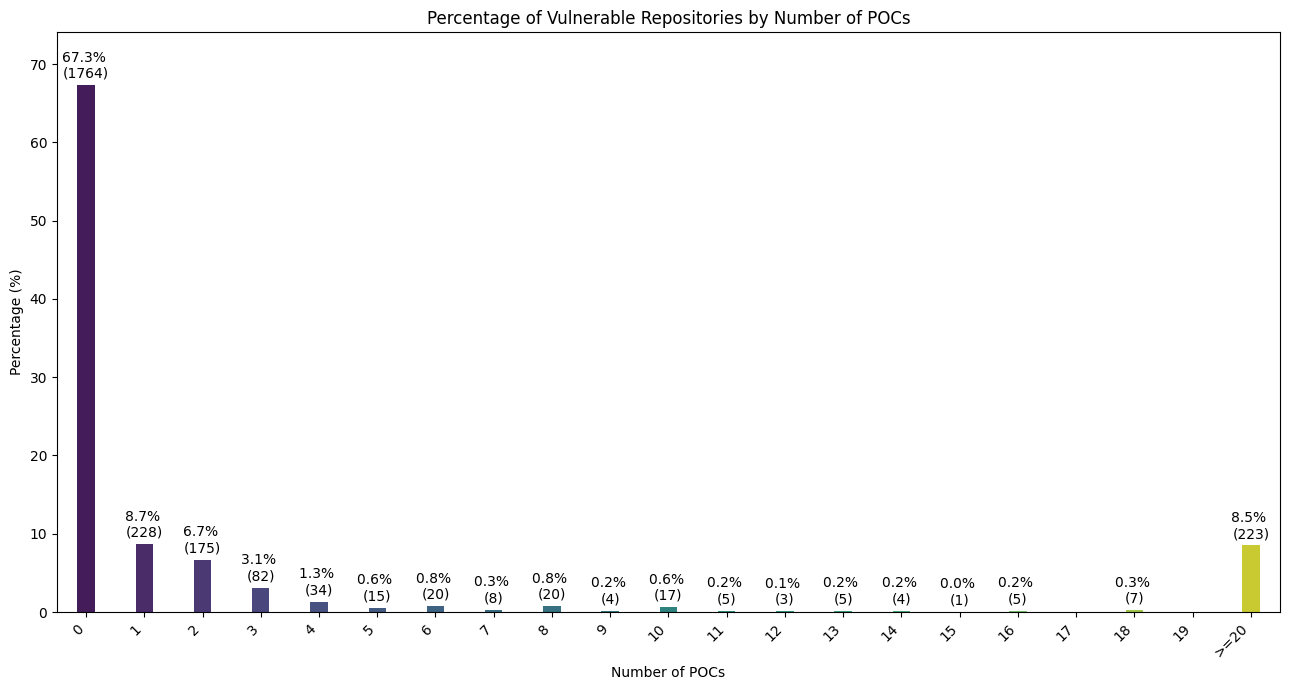

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(13, 7))
ax = sns.barplot(x=pocs_summary_df.index.tolist(), y=pocs_summary_df['Percentage'].values, palette='viridis', width=0.3)


plt.title('Percentage of Vulnerable Repositories by Number of POCs')
plt.xlabel('Number of POCs')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, pocs_summary_df['Percentage'].max() * 1.1)

for i, container in enumerate(ax.containers):
    labels = []
    for j, v in enumerate(container):
        percentage = v.get_height()
        absolute_count = pocs_summary_df['Absolute Count'].iloc[i]


        if percentage > 0:
            labels.append(f'{percentage:.1f}% \n({absolute_count})')
        else:
            labels.append('')

    ax.bar_label(container, labels=labels, padding=3)


ax.set_xticks(range(len(pocs_summary_df.index)))
ax.set_xticklabels(pocs_summary_df.index.tolist())

plt.tight_layout()
plt.show()

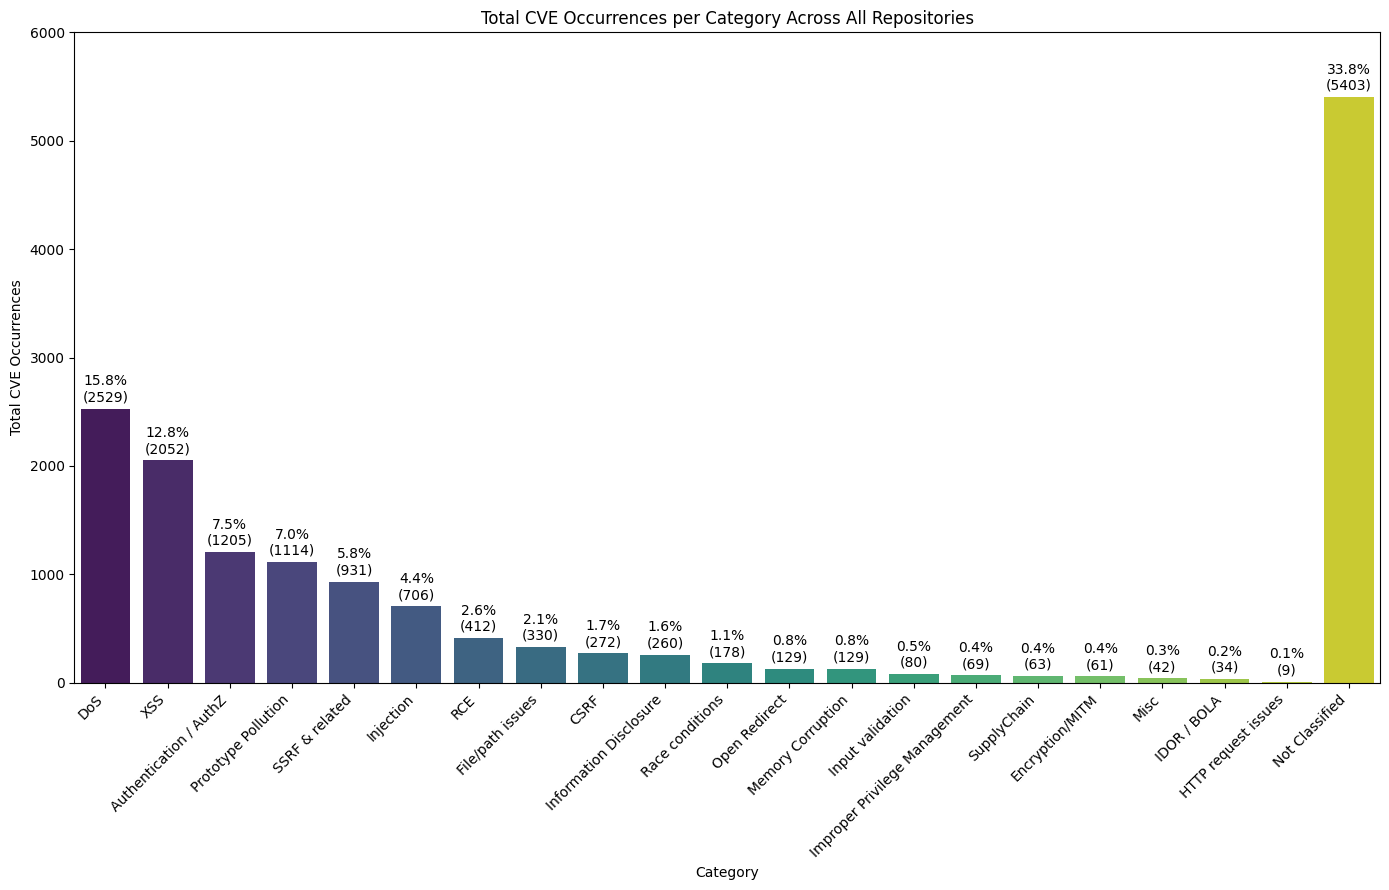

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_cve_parser_df = cve_parser_df[cve_parser_df['category'] != 'UNKNOWN'].copy()

all_cves_list = filtered_df['cve_strings'].str.split(',', expand=True).stack()
all_cves_list = all_cves_list.str.strip()
all_cves_list = all_cves_list[all_cves_list != '']

cve_occurrences = all_cves_list.value_counts().reset_index()
cve_occurrences.columns = ['cve', 'total_occurrences']

cve_occurrences_with_category = pd.merge(
    cve_occurrences,
    filtered_cve_parser_df[['cve', 'category']],
    on='cve',
    how='left'
)

cve_occurrences_with_category['category'] = cve_occurrences_with_category['category'].fillna('Not Classified')

category_cve_counts = cve_occurrences_with_category.groupby('category')['total_occurrences'].sum().reset_index()
category_cve_counts.columns = ['category', 'total_cve_occurrences']

total_cve_occurrences_sum = cve_occurrences['total_occurrences'].sum()

category_cve_counts['percentage'] = (category_cve_counts['total_cve_occurrences'] / total_cve_occurrences_sum) * 100

category_cve_counts = category_cve_counts.sort_values(by='total_cve_occurrences', ascending=False)

plot_data = category_cve_counts.copy()

not_classified_row = plot_data[plot_data['category'] == 'Not Classified'].copy()
plot_data = plot_data[plot_data['category'] != 'Not Classified']
plot_data = pd.concat([plot_data, not_classified_row], ignore_index=True)


plt.figure(figsize=(14, 9))
ax = sns.barplot(x='category', y='total_cve_occurrences', data=plot_data, hue='category', palette='viridis', legend=False)
plt.ylim(0, 6000)
plt.title('Total CVE Occurrences per Category Across All Repositories')
plt.xlabel('Category')
plt.ylabel('Total CVE Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, container in enumerate(ax.containers):
    labels = []
    for v in container:
        height = v.get_height()
        category_name = ax.get_xticklabels()[i].get_text()
        percentage = plot_data[plot_data['category'] == category_name]['percentage'].iloc[0]
        absolute_count = plot_data[plot_data['category'] == category_name]['total_cve_occurrences'].iloc[0]
        labels.append(f'{percentage:.1f}%\n({absolute_count})')

    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

plt.show()

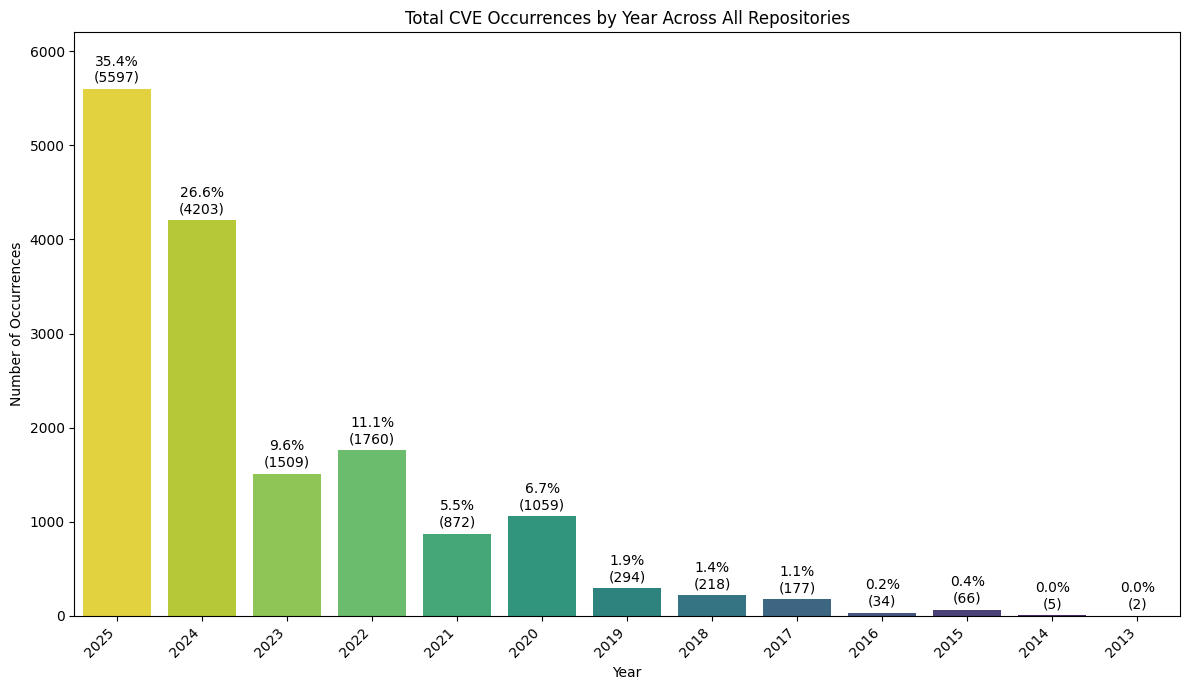

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cve_years = all_cves_list.str.extract(r'CVE-(\d{4})-\d+')

cve_years = cve_years[0].astype('Int64')


year_counts = cve_years.value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values(by='year', ascending=False)

total_cve_occurrences = year_counts['count'].sum()

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='year',
    y='count',
    data=year_counts,
    hue='year',
    palette='viridis',
    legend=False,
    order=year_counts['year']
)

plt.title('Total CVE Occurrences by Year Across All Repositories')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.ylim(0, 6200)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for container in ax.containers:
    labels = []
    for v in container:
        height = v.get_height()
        percentage = (height / total_cve_occurrences) * 100 if total_cve_occurrences > 0 else 0
        labels.append(f'{percentage:.1f}%\n({int(height)})')
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)


plt.show()

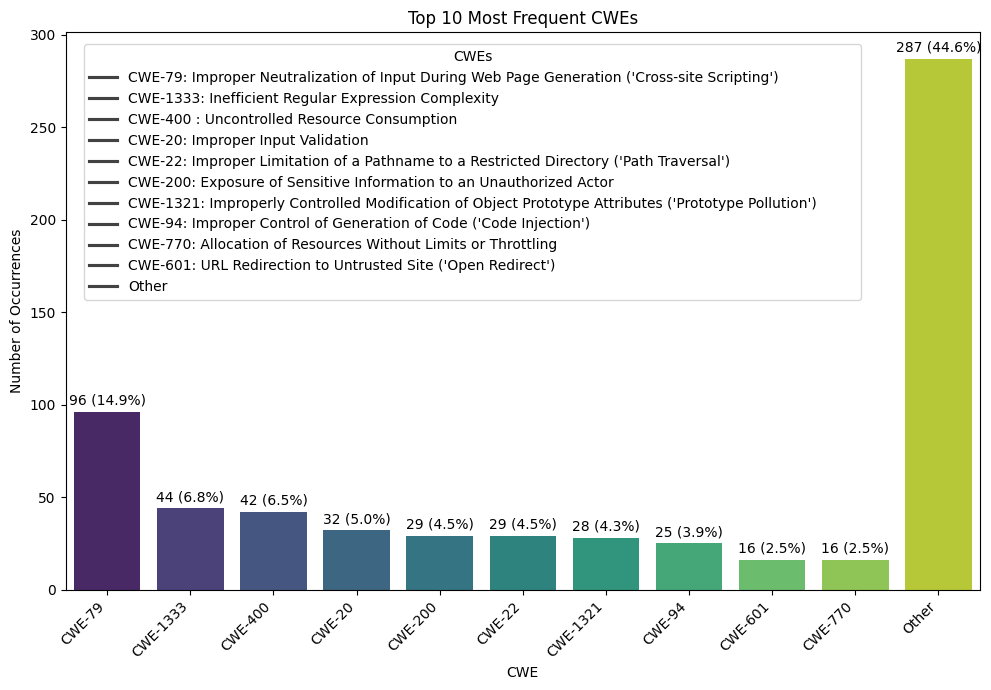

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cwe_list = cve_parser_df['cwes'].str.split(',', expand=True).stack()

cwe_list = cwe_list.str.strip()

cwe_list = cwe_list[cwe_list != '']

cwe_counts = cwe_list.value_counts().reset_index()
cwe_counts.columns = ['cwe', 'count']

top_10_cwes = cwe_counts.head(10).copy()

other_cwes_count = cwe_counts.iloc[10:]['count'].sum()

plot_data = top_10_cwes.copy()
plot_data.loc[len(plot_data)] = ['Other', other_cwes_count]

total_cwe_occurrences = plot_data['count'].sum()
plot_data['percentage'] = (plot_data['count'] / total_cwe_occurrences) * 100

plot_data = plot_data.sort_values(by='count', ascending=False)
other_row = plot_data[plot_data['cwe'] == 'Other'].copy()
plot_data = plot_data[plot_data['cwe'] != 'Other']
plot_data = pd.concat([plot_data, other_row], ignore_index=True)


plt.figure(figsize=(10, 7))
ax = sns.barplot(x='cwe', y='count', data=plot_data, hue='cwe', palette='viridis', legend=False)

plt.title('Top 10 Most Frequent CWEs')
plt.xlabel('CWE')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

legend_labels = ["CWE-79: Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting')",
"CWE-1333: Inefficient Regular Expression Complexity",
"CWE-400 : Uncontrolled Resource Consumption",
"CWE-20: Improper Input Validation",
"CWE-22: Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal')",
"CWE-200: Exposure of Sensitive Information to an Unauthorized Actor",
"CWE-1321: Improperly Controlled Modification of Object Prototype Attributes ('Prototype Pollution')",
"CWE-94: Improper Control of Generation of Code ('Code Injection')",
"CWE-770: Allocation of Resources Without Limits or Throttling",
"CWE-601: URL Redirection to Untrusted Site ('Open Redirect')",
                 "Other"]

for container in ax.containers:
    labels = []
    for v in container:
        height = v.get_height()
        percentage = (height / total_cwe_occurrences) * 100 if total_cwe_occurrences > 0 else 0
        labels.append(f'{int(height)} ({percentage:.1f}%)')
    ax.bar_label(container, labels=labels, padding=3)

plt.legend(title='CWEs', labels=legend_labels, bbox_to_anchor=(0.02, 0.52, 0.85, .2), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

top_ranking_epss = epss_df[epss_df['ranking_epss'] > 0.95].copy()

top_ranking_epss = top_ranking_epss.sort_values(by='epss', ascending=False)

plt.figure(figsize=(14, 7))

cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

colors = sm.to_rgba(top_ranking_epss['epss']).tolist()

ax = sns.barplot(x='cve', y='epss', data=top_ranking_epss, palette=colors, legend=False)

plt.title('CVEs in top 5% percentile')
plt.xlabel('CVE ID')
plt.ylabel('EPSS Score')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

for container in ax.containers:
    labels = [f'{v.get_height():.2f}' for v in container]
    ax.bar_label(container, labels=labels, padding=3, fontsize=6)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('EPSS Score')


plt.show()

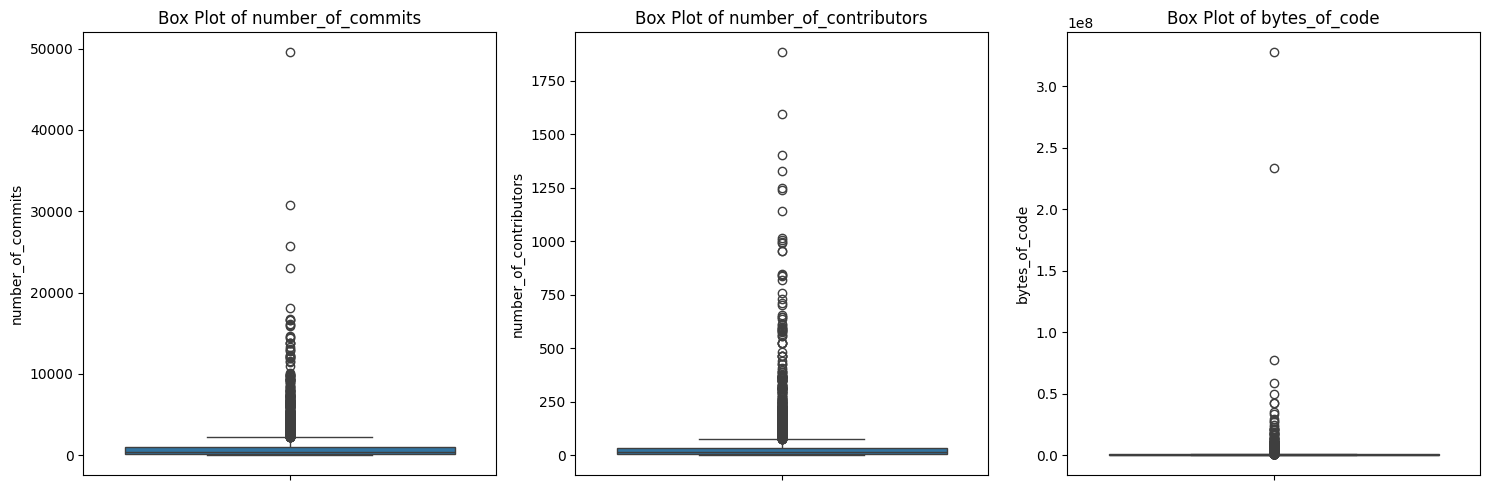

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['number_of_commits', 'number_of_contributors', 'bytes_of_code']

plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=demographics_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
columns_to_describe = ['number_of_commits', 'number_of_contributors', 'bytes_of_code']

print("Statistiche descrittive per le metriche demografiche:")
display(demographics_df[columns_to_describe].describe(percentiles=[.25, .5, .75]))

# La mediana corrisponde al percentile 50%

Statistiche descrittive per le metriche demografiche:


,number_of_commits,number_of_contributors,bytes_of_code
count,4429.000000,4429.000000,4.429000e+03
mean,985.786634,39.194852,8.727643e+05
std,1968.008245,98.869028,6.634958e+06
min,1.000000,1.000000,0.000000e+00
25%,140.000000,5.000000,2.433000e+04
50%,375.000000,13.000000,1.089830e+05
75%,986.000000,34.000000,4.546530e+05
max,49542.000000,1881.000000,3.275376e+08


In [ ]:
from scipy.stats import shapiro

columns_to_test = ['number_of_commits', 'number_of_contributors', 'bytes_of_code']

print("Risultati dei test di Shapiro-Wilk per la normalità:")

for column in columns_to_test:
    stat, p = shapiro(demographics_df[column])
    print(f"\nColonna: {column}")
    print(f"Statistica del test: {stat:.4f}")
    print(f"Valore p: {p:.4f}")

    alpha = 0.05
    if p > alpha:
        print("La colonna sembra essere distribuita normalmente (non possiamo rifiutare l'ipotesi nulla).")
    else:
        print("La colonna non sembra essere distribuita normalmente (rifiutiamo l'ipotesi nulla).")

Risultati dei test di Shapiro-Wilk per la normalità:

Colonna: number_of_commits
Statistica del test: 0.4529
Valore p: 0.0000
La colonna non sembra essere distribuita normalmente (rifiutiamo l'ipotesi nulla).

Colonna: number_of_contributors
Statistica del test: 0.3508
Valore p: 0.0000
La colonna non sembra essere distribuita normalmente (rifiutiamo l'ipotesi nulla).

Colonna: bytes_of_code
Statistica del test: 0.0728
Valore p: 0.0000
La colonna non sembra essere distribuita normalmente (rifiutiamo l'ipotesi nulla).


Matrice di correlazione (Spearman) tra le metriche demografiche e il numero di vulnerabilità:


,number_of_commits,number_of_contributors,bytes_of_code,number_of_vulnerabilities
number_of_commits,1.000000,0.647692,0.533699,0.114817
number_of_contributors,0.647692,1.000000,0.282179,0.024501
bytes_of_code,0.533699,0.282179,1.000000,0.323026
number_of_vulnerabilities,0.114817,0.024501,0.323026,1.000000


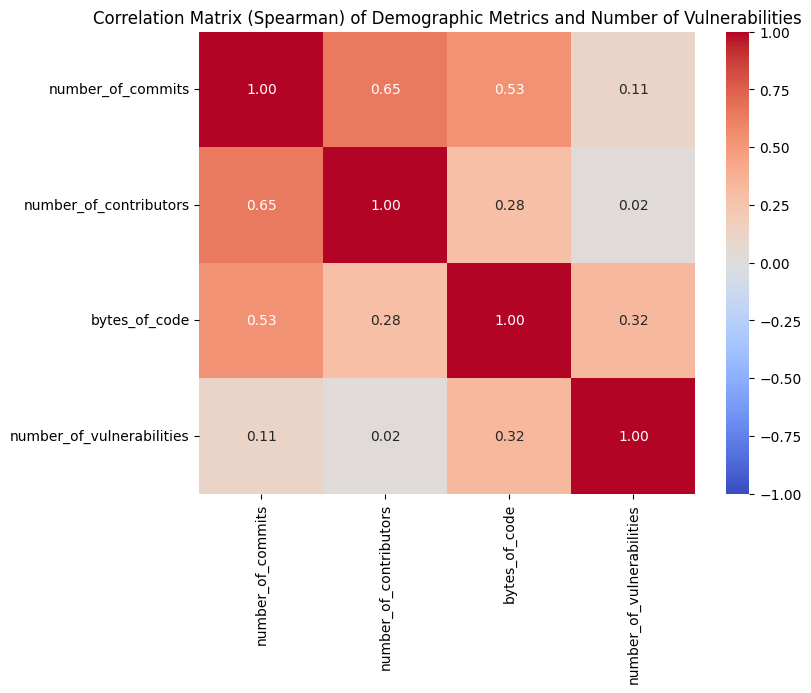

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# filtered_df['is_vulnerable'] = (filtered_df['number_of_vulnerabilities'] > 0).astype(int)

merged_correlation_df = pd.merge(filtered_df, demographics_df[['repository', 'number_of_commits', 'number_of_contributors', 'bytes_of_code']], on='repository', how='left')

correlation_columns = ['number_of_commits', 'number_of_contributors', 'bytes_of_code', 'number_of_vulnerabilities']
correlation_df = merged_correlation_df[correlation_columns]

correlation_matrix = correlation_df.corr(method='spearman')

print("Matrice di correlazione (Spearman) tra le metriche demografiche e il numero di vulnerabilità:")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Spearman) of Demographic Metrics and Number of Vulnerabilities')
plt.show()

Matrice di correlazione (Spearman) tra le metriche demografiche e il numero di vulnerabilità CRITICAL:


,number_of_commits,number_of_contributors,bytes_of_code,num_critical_vulnerabilities
number_of_commits,1.000000,0.647692,0.533699,0.096342
number_of_contributors,0.647692,1.000000,0.282179,0.032043
bytes_of_code,0.533699,0.282179,1.000000,0.202946
num_critical_vulnerabilities,0.096342,0.032043,0.202946,1.000000


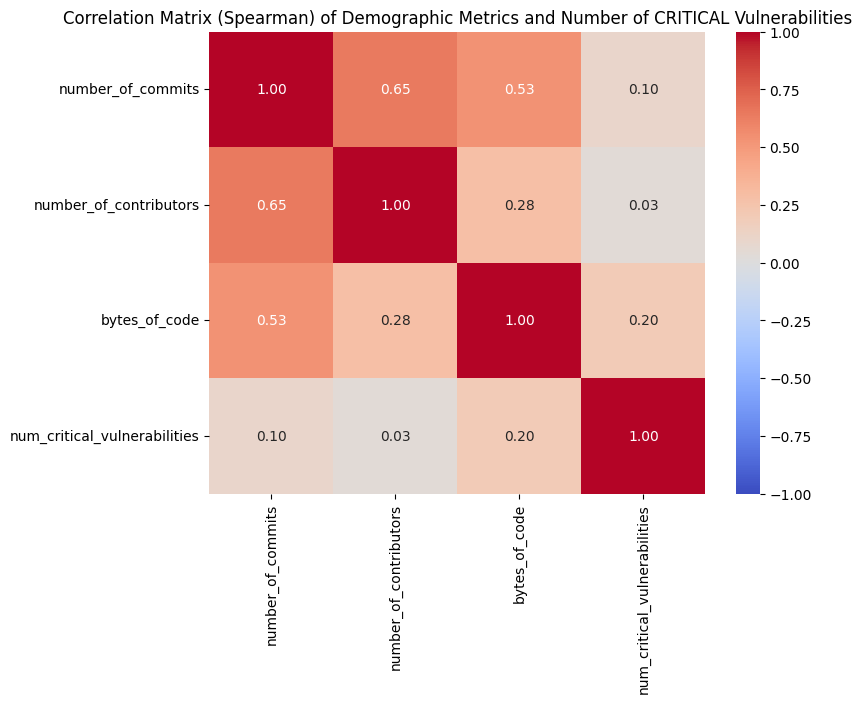

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of critical vulnerabilities for each repository
merged_correlation_df['num_critical_vulnerabilities'] = merged_correlation_df['severity'].str.count('CRITICAL')

# Select the columns for correlation, including the count of critical vulnerabilities
correlation_columns_critical = ['number_of_commits', 'number_of_contributors', 'bytes_of_code', 'num_critical_vulnerabilities']
correlation_df_critical = merged_correlation_df[correlation_columns_critical]

# Calculate the Spearman correlation matrix
correlation_matrix_critical = correlation_df_critical.corr(method='spearman')

print("Matrice di correlazione (Spearman) tra le metriche demografiche e il numero di vulnerabilità CRITICAL:")
display(correlation_matrix_critical)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_critical, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Spearman) of Demographic Metrics and Number of CRITICAL Vulnerabilities')
plt.show()